# PCA


In [70]:
from readdata import create_df

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import matplotlib.pyplot as plt

In [71]:
# Dataframe creation, included other locations as options
# OG Datasets

CLL = create_df('CLL') # College Station
AUS = create_df('AUS') # Austin
DFW = create_df('DFW') # Dallas
IAH = create_df('IAH') # Houston
#______________________________________________________________________________________________________________
# Suggested data mod 1 - Remove 2nd and 3rd Cloud Heights from data frame

# Reasoning: Precipiation must fall from a cloud (straitform or cumuliform) and these clouds are usually the lowest ones
# detected by the ceilometer as they are dense/thick/and filled with soon to be falling precipitation. Would stand to reason
# the other two cloud heights detected are repeats of the same layer and add no benefit but repitition of the same cell.

CLL_mod1 = CLL[['Temp [F]','DP [F]','RH [%]','W Dir [Deg]','W Spd [Kts]','Alt [inHg]','1Hr-Prcp [mm]',
              'Vis [mi]','Cld Hgt1 [Ft]']]
AUS_mod1 = AUS[['Temp [F]','DP [F]','RH [%]','W Dir [Deg]','W Spd [Kts]','Alt [inHg]','1Hr-Prcp [mm]',
              'Vis [mi]','Cld Hgt1 [Ft]']]
DFW_mod1 = DFW[['Temp [F]','DP [F]','RH [%]','W Dir [Deg]','W Spd [Kts]','Alt [inHg]','1Hr-Prcp [mm]',
              'Vis [mi]','Cld Hgt1 [Ft]']]
IAH_mod1 = IAH[['Temp [F]','DP [F]','RH [%]','W Dir [Deg]','W Spd [Kts]','Alt [inHg]','1Hr-Prcp [mm]',
              'Vis [mi]','Cld Hgt1 [Ft]']]
#______________________________________________________________________________________________________________
# Suggested data mod 2 - Remove all Cloud Heights from data frame

# Reasoning: Magnitude difference is fairly severe in comparison, however, I do think it is important to capture data points
# from the cloud/layer in some way and this is the last direct data point from clouds as the present weather and sky cover
# string data points are already removed.

CLL_mod2 = CLL[['Temp [F]','DP [F]','RH [%]','W Dir [Deg]','W Spd [Kts]','Alt [inHg]','1Hr-Prcp [mm]',
              'Vis [mi]']]
AUS_mod2 = AUS[['Temp [F]','DP [F]','RH [%]','W Dir [Deg]','W Spd [Kts]','Alt [inHg]','1Hr-Prcp [mm]',
              'Vis [mi]']]
DFW_mod2 = DFW[['Temp [F]','DP [F]','RH [%]','W Dir [Deg]','W Spd [Kts]','Alt [inHg]','1Hr-Prcp [mm]',
              'Vis [mi]']]
IAH_mod2 = IAH[['Temp [F]','DP [F]','RH [%]','W Dir [Deg]','W Spd [Kts]','Alt [inHg]','1Hr-Prcp [mm]',
              'Vis [mi]']]

In [72]:
# Replaces NaNs in all datasets
AUS = AUS.fillna(0.0)
AUS_mod1 = AUS_mod1.fillna(0.0)
AUS_mod2 = AUS_mod2.fillna(0.0)

# Get data for 'today' (exclude last data point), and normalize
# this is the input data
X = normalize(AUS[:-1].values)
X_mod1 = normalize(AUS_mod1[:-1].values)
X_mod2 = normalize(AUS_mod2[:-1].values)

# Get precipitation data for 'tomorrow'
# This is what we want to predict
y = AUS['1Hr-Prcp [mm]'][1:].values

# Create a prediction based on persistance
# (Rain today is predicted to rain tomorrow)
y_persist = AUS['1Hr-Prcp [mm]'][:-1].values

In [73]:
# Testing

#X_train, X_test, y_train, y_test = train_test_split(X, y)
#X_train, X_test, y_train, y_test = train_test_split(X_mod1, y)
X_train, X_test, y_train, y_test = train_test_split(X_mod2, y) 

explained variance ratio (first 8 components): [8.06085742e-01 1.25115689e-01 3.19755724e-02 2.31264531e-02
 8.02243308e-03 4.53748092e-03 9.03793642e-04 2.32835536e-04]


Text(0.5, 1.0, 'PCA of AUS dataset')

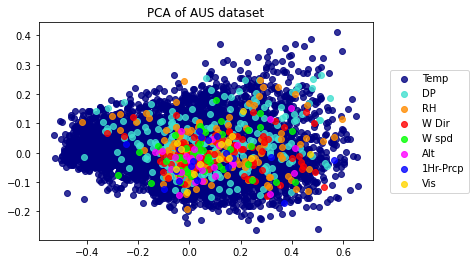

In [74]:
# PCA to see the variance for each component 

y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X_mod2, y) 

pca = PCA(n_components = 8)
X_r = pca.fit(X_mod2).transform(X_mod2)

# Percentage of variance explained for each components
print('explained variance ratio (first 8 components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'red', 'lime', 'magenta', 'blue', 'gold']
lw = 1
compo = ['Temp', 'DP', 'RH', 'W Dir', 'W spd', 'Alt','1Hr-Prcp', 'Vis']

for color, i, comp in zip(colors, [0,1,2,3,4,5,6,7], compo):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=compo[i])
plt.legend(bbox_to_anchor=(0.3, 0.5, 1, 0),loc = 7, shadow=False, scatterpoints=1)
plt.title('PCA of AUS dataset')

<BarContainer object of 8 artists>

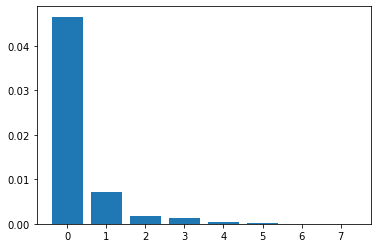

In [75]:
# Scree plot 
plt.bar([0,1,2,3,4,5,6,7],pca.explained_variance_)

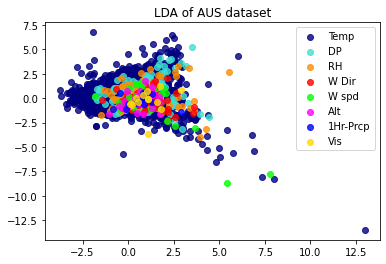

explained variance ratio (first 8 components): [8.06265299e-01 1.01122744e-01 5.19919912e-02 1.66174663e-02
 1.38475513e-02 5.33155270e-03 4.27787113e-03 5.45524972e-04]


In [76]:
lda = LinearDiscriminantAnalysis(n_components = 8)
y=y.astype('int') # need this line for the next line to work
X_r2 = lda.fit(X_mod2, y).transform(X_mod2)

plt.figure()
for color, i, comp in zip(colors,  [0, 1, 2, 3, 4, 5, 6,7], compo):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=compo[i])
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of AUS dataset')

plt.show()
print('explained variance ratio (first 8 components): %s'
      % str(lda.explained_variance_ratio_))